## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.215146  1.374986  1.536216 -1.661633 -0.409803 -0.795021
1  1.712228  0.057436 -1.275033  0.778048 -0.209366  1.560818
2 -1.221598 -0.534508 -0.308739 -0.242625 -0.129799 -1.276431
3  0.506151  1.093435 -0.454575 -0.500863  1.763358  0.908191
4  0.383950  1.094870 -0.790709 -1.456349  0.526185  0.225784


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9744036	total: 65ms	remaining: 1m 4s
1:	learn: 0.9641989	total: 65.6ms	remaining: 32.8s
2:	learn: 0.9551589	total: 66.2ms	remaining: 22s
3:	learn: 0.9448273	total: 66.9ms	remaining: 16.7s
4:	learn: 0.9363810	total: 67.5ms	remaining: 13.4s
5:	learn: 0.9269059	total: 68.1ms	remaining: 11.3s
6:	learn: 0.9168135	total: 68.7ms	remaining: 9.74s
7:	learn: 0.9078967	total: 69.3ms	remaining: 8.59s
8:	learn: 0.8990442	total: 69.8ms	remaining: 7.69s
9:	learn: 0.8906762	total: 70.4ms	remaining: 6.97s
10:	learn: 0.8827036	total: 70.8ms	remaining: 6.37s
11:	learn: 0.8726746	total: 71.3ms	remaining: 5.87s
12:	learn: 0.8633114	total: 71.8ms	remaining: 5.46s
13:	learn: 0.8555586	total: 72.4ms	remaining: 5.1s
14:	learn: 0.8492211	total: 72.9ms	remaining: 4.79s
15:	learn: 0.8421151	total: 73.4ms	remaining: 4.51s
16:	learn: 0.8351176	total: 73.9ms	remaining: 4.28s
17:	learn: 0.8271590	total: 74.5ms	remaining: 4.06s
18:	learn: 0.8196148	total: 75ms	remaining: 3.87s

87:	learn: 0.4482282	total: 109ms	remaining: 1.13s
88:	learn: 0.4450536	total: 109ms	remaining: 1.12s
89:	learn: 0.4414814	total: 110ms	remaining: 1.11s
90:	learn: 0.4380903	total: 111ms	remaining: 1.1s
91:	learn: 0.4341142	total: 111ms	remaining: 1.09s
92:	learn: 0.4302993	total: 111ms	remaining: 1.09s
93:	learn: 0.4264558	total: 112ms	remaining: 1.08s
94:	learn: 0.4236574	total: 112ms	remaining: 1.07s
95:	learn: 0.4201267	total: 113ms	remaining: 1.06s
96:	learn: 0.4173308	total: 113ms	remaining: 1.05s
97:	learn: 0.4135337	total: 114ms	remaining: 1.05s
98:	learn: 0.4102909	total: 114ms	remaining: 1.04s
99:	learn: 0.4073554	total: 115ms	remaining: 1.03s
100:	learn: 0.4045497	total: 115ms	remaining: 1.02s
101:	learn: 0.4013741	total: 116ms	remaining: 1.02s
102:	learn: 0.3985686	total: 116ms	remaining: 1.01s
103:	learn: 0.3951904	total: 117ms	remaining: 1s
104:	learn: 0.3919194	total: 117ms	remaining: 998ms
105:	learn: 0.3893808	total: 117ms	remaining: 991ms
106:	learn: 0.3866589	total: 

246:	learn: 0.1531403	total: 187ms	remaining: 571ms
247:	learn: 0.1519631	total: 188ms	remaining: 570ms
248:	learn: 0.1511056	total: 188ms	remaining: 568ms
249:	learn: 0.1501943	total: 189ms	remaining: 566ms
250:	learn: 0.1491223	total: 189ms	remaining: 564ms
251:	learn: 0.1482944	total: 190ms	remaining: 563ms
252:	learn: 0.1474358	total: 190ms	remaining: 561ms
253:	learn: 0.1464525	total: 191ms	remaining: 560ms
254:	learn: 0.1454824	total: 191ms	remaining: 558ms
255:	learn: 0.1447158	total: 192ms	remaining: 557ms
256:	learn: 0.1438264	total: 192ms	remaining: 556ms
257:	learn: 0.1427102	total: 193ms	remaining: 555ms
258:	learn: 0.1418221	total: 193ms	remaining: 553ms
259:	learn: 0.1408992	total: 194ms	remaining: 552ms
260:	learn: 0.1399854	total: 194ms	remaining: 551ms
261:	learn: 0.1391172	total: 195ms	remaining: 549ms
262:	learn: 0.1383063	total: 195ms	remaining: 548ms
263:	learn: 0.1373703	total: 196ms	remaining: 546ms
264:	learn: 0.1362203	total: 196ms	remaining: 545ms
265:	learn: 

467:	learn: 0.0464149	total: 293ms	remaining: 333ms
468:	learn: 0.0461017	total: 293ms	remaining: 332ms
469:	learn: 0.0457922	total: 294ms	remaining: 331ms
470:	learn: 0.0454873	total: 294ms	remaining: 330ms
471:	learn: 0.0452743	total: 294ms	remaining: 329ms
472:	learn: 0.0449752	total: 295ms	remaining: 328ms
473:	learn: 0.0447800	total: 295ms	remaining: 328ms
474:	learn: 0.0444875	total: 296ms	remaining: 327ms
475:	learn: 0.0441953	total: 296ms	remaining: 326ms
476:	learn: 0.0439905	total: 296ms	remaining: 325ms
477:	learn: 0.0438608	total: 297ms	remaining: 324ms
478:	learn: 0.0435703	total: 297ms	remaining: 323ms
479:	learn: 0.0433722	total: 298ms	remaining: 323ms
480:	learn: 0.0430947	total: 298ms	remaining: 322ms
481:	learn: 0.0428226	total: 299ms	remaining: 321ms
482:	learn: 0.0425375	total: 299ms	remaining: 320ms
483:	learn: 0.0423475	total: 300ms	remaining: 320ms
484:	learn: 0.0420505	total: 300ms	remaining: 319ms
485:	learn: 0.0418701	total: 301ms	remaining: 318ms
486:	learn: 

633:	learn: 0.0218947	total: 370ms	remaining: 214ms
634:	learn: 0.0218044	total: 371ms	remaining: 213ms
635:	learn: 0.0217031	total: 372ms	remaining: 213ms
636:	learn: 0.0216157	total: 372ms	remaining: 212ms
637:	learn: 0.0215178	total: 373ms	remaining: 211ms
638:	learn: 0.0214333	total: 373ms	remaining: 211ms
639:	learn: 0.0213264	total: 373ms	remaining: 210ms
640:	learn: 0.0212362	total: 374ms	remaining: 209ms
641:	learn: 0.0211318	total: 374ms	remaining: 209ms
642:	learn: 0.0210297	total: 375ms	remaining: 208ms
643:	learn: 0.0208864	total: 375ms	remaining: 207ms
644:	learn: 0.0207875	total: 376ms	remaining: 207ms
645:	learn: 0.0206893	total: 376ms	remaining: 206ms
646:	learn: 0.0206348	total: 376ms	remaining: 205ms
647:	learn: 0.0206064	total: 377ms	remaining: 205ms
648:	learn: 0.0205574	total: 377ms	remaining: 204ms
649:	learn: 0.0204607	total: 378ms	remaining: 203ms
650:	learn: 0.0203226	total: 378ms	remaining: 203ms
651:	learn: 0.0202282	total: 379ms	remaining: 202ms
652:	learn: 

851:	learn: 0.0089398	total: 477ms	remaining: 82.8ms
852:	learn: 0.0089072	total: 477ms	remaining: 82.2ms
853:	learn: 0.0088615	total: 478ms	remaining: 81.7ms
854:	learn: 0.0088086	total: 478ms	remaining: 81.1ms
855:	learn: 0.0087992	total: 479ms	remaining: 80.5ms
856:	learn: 0.0087584	total: 479ms	remaining: 79.9ms
857:	learn: 0.0087278	total: 479ms	remaining: 79.3ms
858:	learn: 0.0087186	total: 480ms	remaining: 78.8ms
859:	learn: 0.0086758	total: 480ms	remaining: 78.2ms
860:	learn: 0.0086432	total: 481ms	remaining: 77.6ms
861:	learn: 0.0086179	total: 481ms	remaining: 77.1ms
862:	learn: 0.0085670	total: 482ms	remaining: 76.5ms
863:	learn: 0.0085581	total: 482ms	remaining: 75.9ms
864:	learn: 0.0085171	total: 483ms	remaining: 75.4ms
865:	learn: 0.0085084	total: 483ms	remaining: 74.8ms
866:	learn: 0.0084768	total: 484ms	remaining: 74.2ms
867:	learn: 0.0084338	total: 484ms	remaining: 73.6ms
868:	learn: 0.0083847	total: 485ms	remaining: 73.1ms
869:	learn: 0.0083532	total: 485ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

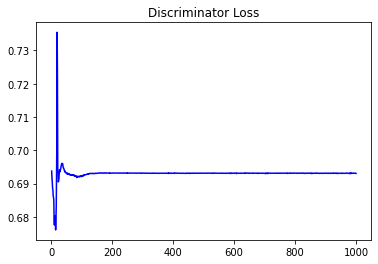

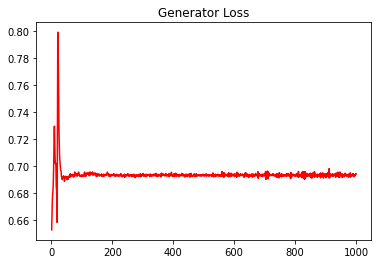

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15262131247393548


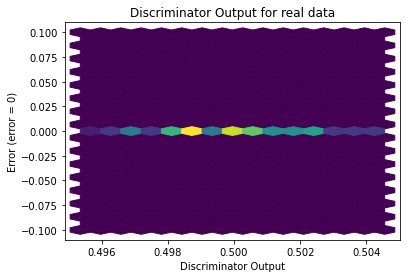

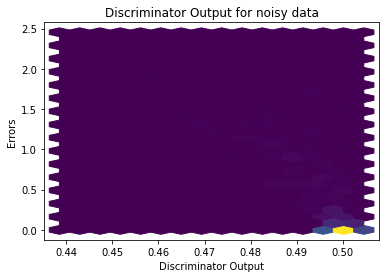

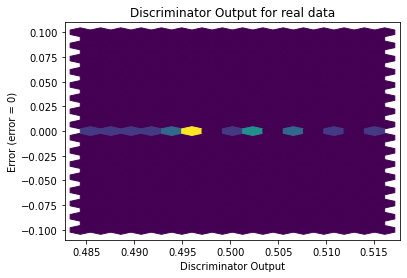

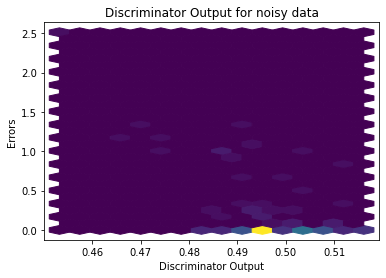

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


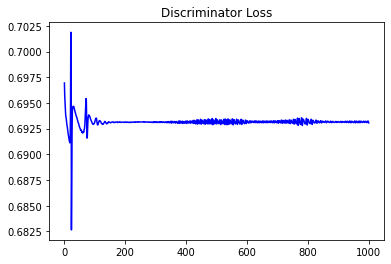

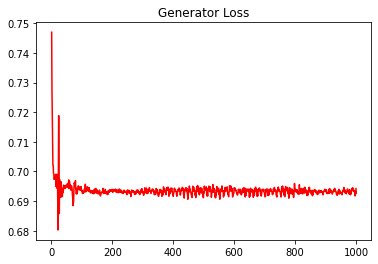

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15262189275196134


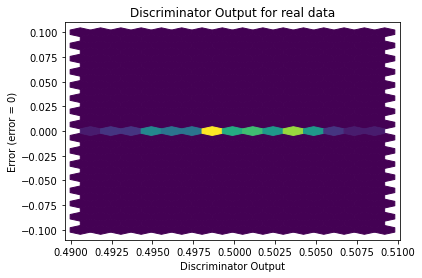

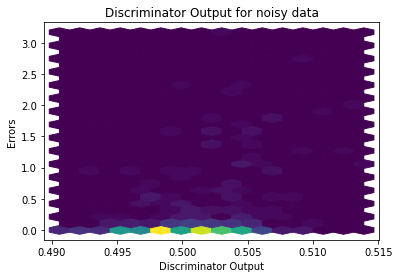

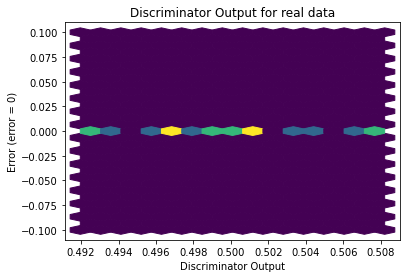

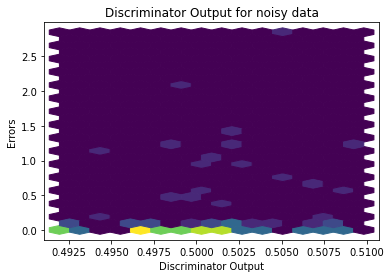

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0428]], requires_grad=True)
